In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

________________________________________________________________________________________________________________
#### Q1

Text(0, 0.5, 'Probability Density')

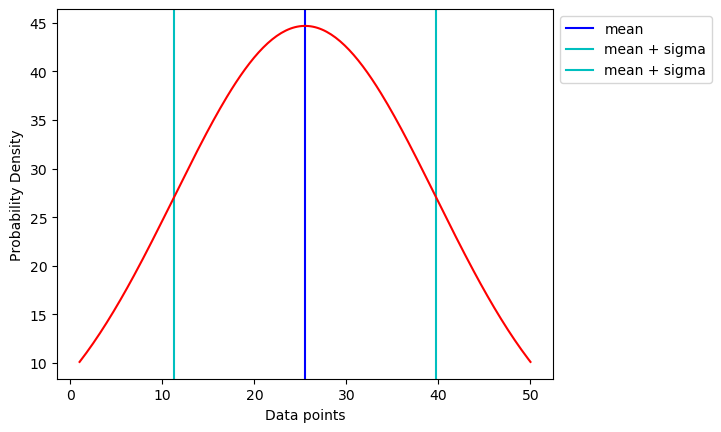

In [19]:
x = np.linspace(1,50,200)

#using formula for normal distribution
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density


#calculating means and std dev
mean = np.mean(x)
sd = np.std(x)

#plotting 'mean' and 'mean + stddev' lines to show how in normal distribution, most of the data lies between these
plt.axvline(x = mean, color = 'b', label = 'mean')

plt.axvline(x = mean + sd, color = 'c', label = 'mean + sigma')
plt.axvline(x = mean - sd, color = 'c', label = 'mean + sigma')

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

pdf = normal_dist(x,mean,sd)

plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

________________________________________________________________________________________________________________
#### Q2
##### Part a

In [60]:
data = pd.read_csv('Assignment 1 - Q2.2.csv')

#inserting column with changed grades, to calculate expectation & variance simultaneously 
data.insert(1, column = "Grades_new", value = data['Grades'] + 1)

data.head()

,Grades,Grades_new,Number of students
0,5,6,32
1,6,7,44
2,7,8,70
3,8,9,50
4,9,10,12


In [61]:
#adding probability function as a column
data.insert(3, column = "f(x)", value = (data["Number of students "]/np.sum(data["Number of students "])))
data.head()

,Grades,Grades_new,Number of students,f(x)
0,5,6,32,0.148837
1,6,7,44,0.204651
2,7,8,70,0.325581
3,8,9,50,0.232558
4,9,10,12,0.055814


In [65]:
expec = np.sum(data["Grades"]*data["f(x)"])
expec_new = np.sum(data["Grades_new"]*data["f(x)"])
print("The expectation is ", expec)
print("The new expectation is ", expec_new)

The expectation is  6.939534883720929
The new expectation is  7.93953488372093


In [67]:
var = np.sum(data['Number of students ']*((data['Grades'] - expec)**2))/np.sum(data['Number of students '])
var_new = np.sum(data['Number of students ']*((data['Grades_new'] - expec_new)**2))/np.sum(data['Number of students '])
print("The variance is ", var)
print("The new variance is ", var_new)

The variance is  1.5451811790156842
The new variance is  1.545181179015684


________________________________________________________________________________________________________________
#### Q3

In [69]:
df = pd.read_csv('Assignment 1 - Q3.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [82]:
def expectation(x):
    return np.mean(x)

def variance(x):
    var = np.sum((x - np.mean(x))**2)/(len(x) - 1)
    return var
    
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    cov = np.sum((x - mean_x)*(y - mean_y))/(len(x) - 1)
    return cov

def correlation(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    sub_x = x - mean_x
    sub_y = y - mean_y

    numerator = np.sum(sub_x*sub_y)

    std_deviation_x = np.sum(sub_x**2)
    std_deviation_y = np.sum(sub_y**2)

    denominator = (std_deviation_x*std_deviation_y)**0.5 
    cor = numerator/denominator
    return cor

In [83]:
expec_h = expectation(df['Height'])
expec_w = expectation(df['Weight'])
print("Expectation of Height is :", expec_h)
print("Expectation of Weight is :", expec_w)

var_h = variance(df['Height'])
var_w = variance(df['Weight'])
print("variance of Height is :", var_h)
print("Variance of Weight is :", var_w)

covar = covariance(df['Height'], df['Weight'])
corr = correlation(df['Height'], df['Weight'])
print("Covarience between Height and Weight is :", covar)
print("Correlation between Height and Weight is :", corr)


Expectation of Height is : 68.95975707921001
Expectation of Weight is : 186.9907173851
variance of Height is : 7.996557216218476
Variance of Weight is : 382.84696006200915
Covarience between Height and Weight is : 46.73405047953433
Correlation between Height and Weight is : 0.8446354347804556


Text(0, 0.5, 'Weight')

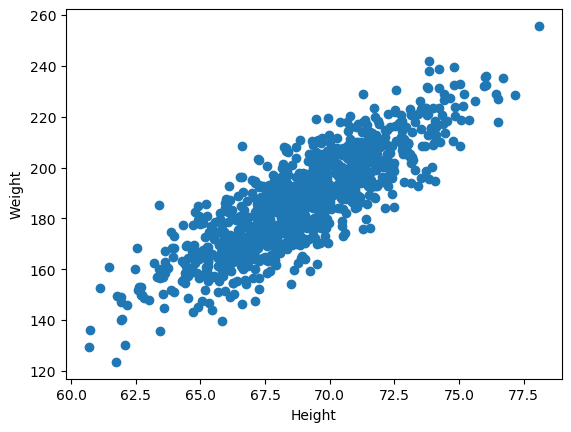

In [84]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')